In [8]:
import argparse
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import os
from pathlib import Path

colors = {"tblis" : "olive", "gsl" : "green", "blas" : "red", "taco" : "blue", "gsl_tensor" : "cyan", \
          "dot_blas" : "gold", "dot_gsl" : "grey", "gemv_blas" : "purple", "gemv_gsl" : "pink", "mkl" :"black", "cuda":"green",\
         "dot_mkl" : "silver", "gemv_mkl" : "yellow", "stardust":"orange",
         "taco_csr" : "green", "taco_coo" : "red", "row" : "olive", "col" : "green", "block" : "red", 
         "block_diagonal" : "blue", "random" : "cyan", "bug_mkl":"purple"}

markers = {"tblis" : "o", "gsl" : "p", "blas" : "*", "taco" : ".", "gsl_tensor" : ".", \
          "dot_blas" : ".", "dot_gsl" : ".", "gemv_blas" : ".", "gemv_gsl" : "p", "mkl" :"v", "cuda":"s",\
         "dot_mkl" : ".", "gemv_mkl" : ".", "stardust":"1", "taco_coo" : "p", "taco_csr" : ".", \
          "row" : "o", "col" : "p", "random" : "*", "block" : ".", "block_diagonal" : ".", "bug_mkl": "."}
                      
linestyles = {"tblis" : "-", "gsl" : "-", "blas" : "-", "taco" : "-", "gsl_tensor" : "-", \
          "dot_blas" : "-", "dot_gsl" : "-", "gemv_blas" : "-", "gemv_gsl" : "-", "mkl" :"--", "cuda":"-",\
         "dot_mkl" : "-", "gemv_mkl" : "-", "stardust":"-", "taco_coo" : "-", "taco_csr" : "--",\
           "row" : "-", "col" : "-", "block" : "-", "block_diagonal" : "-", "random" : "-", "bug_mkl":"-" }

hatches = {"mkl" : "/", "taco" : "o", "blas" : "*"}

In [9]:
def generate_bar_plots(name, directory, systems, matrices, expr, unit="ms"):
    all_dfs = None
    for matrix in matrices:
        result = None
        for system in systems:
            data = json.load(open(f'{directory}/{matrix}/{system}'))
            df = pd.DataFrame(data["benchmarks"])
            df = df[df['aggregate_name'] == "median"]['real_time']
            df = df.rename_axis('Label').reset_index()
            df.rename(columns = {'real_time': f'{system}'}, inplace = True)
           

            if result is None:
                result = df
            else:
                result = pd.merge(result, df, on='Label', how='outer')
        result['SuiteSparseMatrix'] = matrix
        
        if all_dfs is None:
            all_dfs = result
        else:
            all_dfs = pd.concat([all_dfs, result])

    all_dfs = all_dfs.drop(['Label'], axis=1)
    
    full_plt = all_dfs.plot.bar(x='SuiteSparseMatrix', logy=True, label=systems)
    
    plt.ylabel(f'Runtime ({unit})')
    plt.xlabel('SuiteSparse Matrix Name')
    
    for system in systems:
        if system == "taco":
            continue
        all_dfs[system] = all_dfs["taco"]/all_dfs[system]
    
    print(all_dfs)

          taco       mkl      blas SuiteSparseMatrix
0     0.006613  0.353353  0.540896             Trec5
0     0.007034  0.327080  0.437292          Ragusa18
0     0.006763  0.311285  0.412813        lpi_bgprtr
0     0.012566  0.276119  0.312097          lp_sc50b
0     1.177303  1.331247  1.678987          cavity02
0     1.197664  1.332807  1.528687          cavity03
0    12.089265  0.539295  0.944674          lp_nug08
0  1281.862909  0.063495  0.124263          m3plates
0   816.734070  3.569406  6.478009            IG5-12
0  2480.098870  0.805035  1.496346        g7jac020sc
0  2513.326384  0.638913  1.186281            gemat1
0  9987.979106  0.292063  0.578269  mimo28x28_system


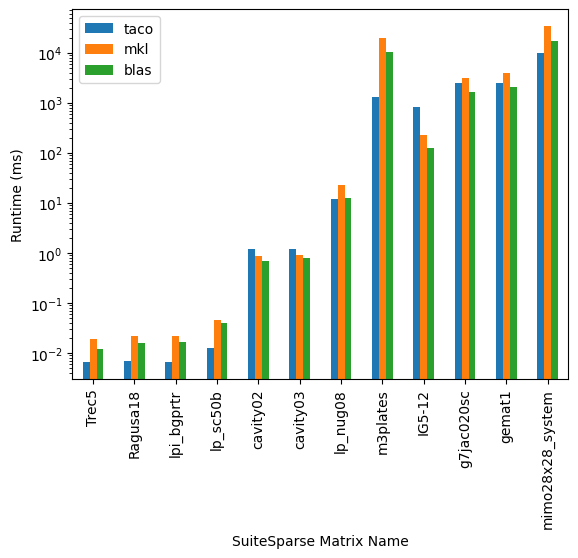

In [16]:
generate_bar_plots("Suitesparse", "./data-benchmarks/suitesparse/", ["taco", "mkl", "blas"],\
                   ["Trec5","Ragusa18", "lpi_bgprtr", "lp_sc50b",\
                    "cavity02", "cavity03", "lp_nug08", "m3plates",\
                    "IG5-12", "g7jac020sc", "gemat1", "mimo28x28_system"], "SDDMM")